In [1]:
%pylab --no-import-all
%matplotlib inline
from scipy import stats
import seaborn as sns


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [15]:
from collections import defaultdict
import pandas as pd

In [36]:
ns = [5, 10, 20, 50, 100, 1000, 10000]
mvar_t = []
for n in ns:
    var = []
    for k in range(300):
        tries = []
        for j in range(100):
            i = 0
            pval=1
            while not (pval < 0.05):
                a = np.random.normal(10, 5, n)
                b = np.random.normal(10, 5, n)
                t, pval = stats.ttest_ind(a, b)
                i+=1
            tries.append(i)
        mvar_t.append({'time': n, 'value':np.var(tries), 'unit': k})

df_var = pd.DataFrame(mvar_t)

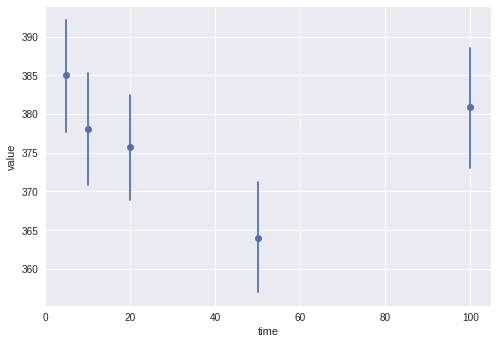

In [35]:
sns.tsplot(df_var, unit='unit', time='time', value='value', interpolate=False, err_style='ci_bars')